In [43]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Read data
data = pd.read_csv("data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Feature selection
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = ["Survived"]

In [48]:
# Preprocessing
data = data[features + target]
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [84]:
# Missing value
pd.isna(data).sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [77]:
# For embarked we can just fill with mode
print(data["Embarked"].mode())
data["Embarked"].fillna("S", inplace=True)

0    S
Name: Embarked, dtype: object


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

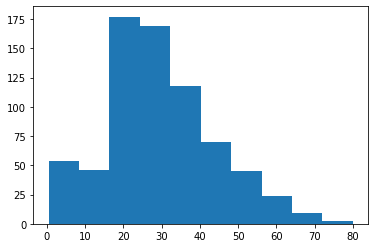

In [81]:
# For Age we will check the distribution
plt.hist(data["Age"])
# Mode < median < mean

In [83]:
# Thus we fill Age using median
data["Age"].fillna(data["Age"].median(), inplace=True)

In [86]:
from sklearn.model_selection import train_test_split
xtrain, xvalidation, ytrain, yvalidation = train_test_split(data[features], data[target], test_size=0.3)

In [87]:
xtrain = pd.get_dummies(xtrain)
xvalidation = pd.get_dummies(xvalidation)

In [88]:
xvalidation

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
230,1,35.0,1,0,83.4750,1,0,0,0,1
194,1,44.0,0,0,27.7208,1,0,1,0,0
105,3,28.0,0,0,7.8958,0,1,0,0,1
84,2,17.0,0,0,10.5000,1,0,0,0,1
866,2,27.0,1,0,13.8583,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
490,3,28.0,1,0,19.9667,0,1,0,0,1
409,3,28.0,3,1,25.4667,1,0,0,0,1
571,1,53.0,2,0,51.4792,1,0,0,0,1
416,2,34.0,1,1,32.5000,1,0,0,0,1


In [89]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()
glm.fit(xtrain, ytrain)

/Users/mqincmu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mqincmu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
from sklearn.metrics import accuracy_score
print('The training score for logistic regression is:',(glm.score(xtrain,ytrain)*100), '%')
print('Validation accuracy', accuracy_score(yvalidation, glm.predict(xvalidation)))

The training score for logistic regression is: 79.7752808988764 %
Validation accuracy 0.8022388059701493


In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=6)
rf.fit(xtrain, ytrain)

/var/folders/hc/sl675fj12cv0634xzrx9v2780000gn/T/ipykernel_94566/2138331502.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


RandomForestClassifier(n_estimators=6)

In [93]:
print('The training score for logistic regression is:',(rf.score(xtrain, ytrain)*100), '%')
print('Validation accuracy', accuracy_score(yvalidation, rf.predict(xvalidation)))

The training score for logistic regression is: 96.14767255216692 %
Validation accuracy 0.8208955223880597


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=7, learning_rate=1.1)
gb.fit(xtrain, ytrain)

/Users/mqincmu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.1, n_estimators=7)

In [95]:
print('The training score for logistic regression is:',(gb.score(xtrain,ytrain)*100), '%')
print('Validation accuracy', accuracy_score(yvalidation, gb.predict(xvalidation)))

The training score for logistic regression is: 87.80096308186197 %
Validation accuracy 0.8246268656716418


In [99]:
test = pd.read_csv("data/test.csv")

In [98]:
test = test[features]
pd.isna(test).sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [100]:
test["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64